In [1]:
from veldis.veldis import Veldis
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit
from specim.specfuncs import spec1d

## The results of the tests. There are many very thin sharp emision or asborption type lines over very short waverange which are due to lower SNR of the data. These either don't affect the fit much or tend to increase the velocity dispersion. So I decided not to mask those lines. After some experimentation it seeems if we don't mask the H-beta line at the red side then the velocity dispersion values become more stable. So I decided to keep this H-beta line. It seems we should also cut out part blue ward of H-eta line. And H-delta line should also not be included as it lies within A band which is usually from around 7580-7700 Ang.

In [2]:
spec = Veldis('../spectra_extraction/J0818_ESI_spectra/spec1d_J0818_coadd2d_deflector.fits', 
              informat='fits', logwav=True, trimsec=[4750, 12000]) #13600, [4130, 12200]


Reading spectrum from ../spectra_extraction/J0818_ESI_spectra/spec1d_J0818_coadd2d_deflector.fits
Expected file format: fits
 Spectrum Start:  6961.41
 Spectrum End:     9168.65
 Dispersion (1st pixel):   0.26
 Dispersion (average):      0.30



<IPython.core.display.Javascript object>


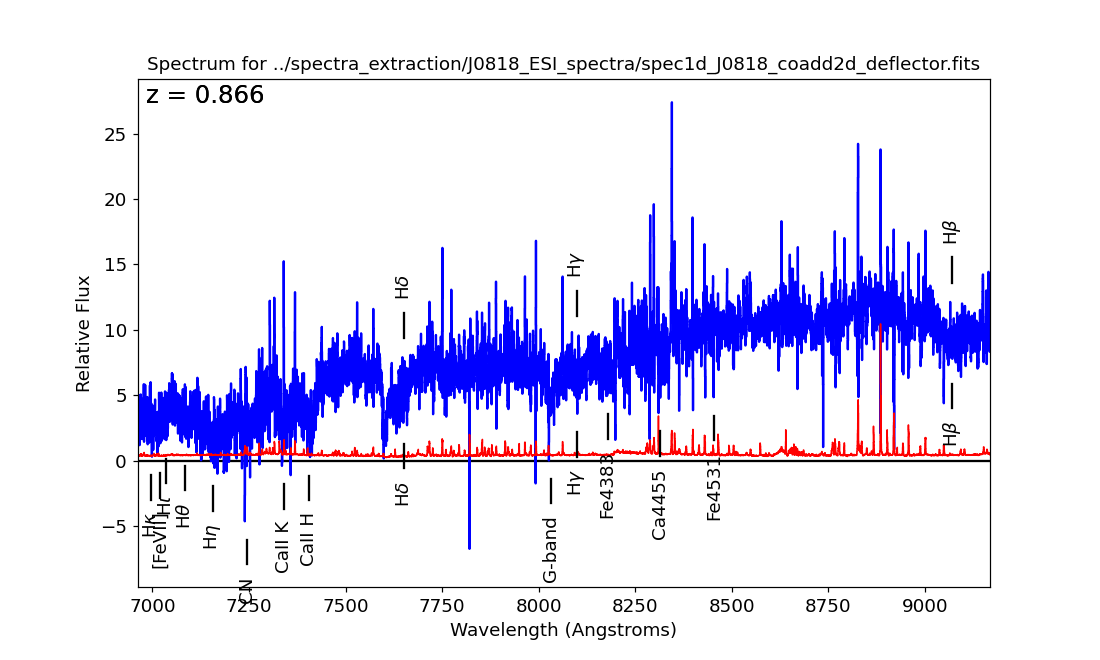


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       6997.50
[Fe VII]      3761.40       7018.77
H-iota        3770.00       7034.82
H-theta       3797.00       7085.20
H-eta         3835.00       7156.11
CN bandhd     3883.00       7245.68
CaII K        3933.67       7340.23
CaII H        3968.47       7405.17
H-delta       4101.00       7652.47
G-band        4305.00       8033.13
H-gamma       4340.00       8098.44
Fe4383        4383.00       8178.68
Ca4455        4455.00       8313.03
Fe4531        4531.00       8454.85
H-beta        4861.00       9070.63


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-delta       4101.00       7652.47
H-gamma       4340.00       8098.44
H-beta        4861.00       9070.63



In [6]:
%matplotlib notebook
fg = plt.figure(figsize=(10,6))
spec.smooth(3, fig=fg)
spec.mark_lines('abs', z=0.866, usesmooth=True)
spec.mark_lines('em', z=0.866, usesmooth=True)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389931 km/s


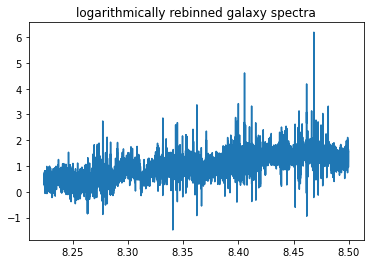

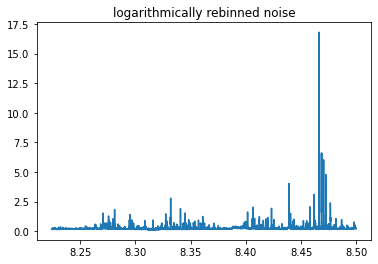

In [4]:
spec.cal_parm(z=0.866, high_z=True, logscale=True, veldis_start=250, noise_scale=0.2)

In [5]:
temp_spec = spec.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.3)# temp_num=500,


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -22146.213010 

sigma_diff : 0.989778


In [83]:
mask_reg = np.log(np.array([(7570, 7745)])/1.866) 
mask_reg1 = np.log(np.array([(6960, 7100), (7570, 7745)])/1.866)
mask_reg2 = np.log(np.array([(6960, 7100), (7570, 7645)])/1.866)
mask_reg3 = np.log(np.array([(7570, 7645)])/1.866)

#7735 (6960, 7100),(8960, 9170)
#, (9360, 9394)])), (8194, 8207),
#(7238, 7240), (7312, 7317), (7339, 7343), (7367, 7370), (7434, 7443),
#(7747, 7753), (7817, 7825), (7888, 7893), (7990, 7995), (8024, 8028), (8058, 8066),
#(8823, 8829),
#(8284, 8311), (8340, 8355),(8883, 8923)
#print(mask_reg)

[[8.22413765 8.24405296]
 [8.30815124 8.31801002]]



degree : 4
 Best Fit:       Vel     sigma
 comp.  0:        96       374
chi2/DOF: 1.650; degree = 4; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1268

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:        83       373
chi2/DOF: 1.648; degree = 5; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1268

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:        83       368
chi2/DOF: 1.648; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1268

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:        83       368
chi2/DOF: 1.648; degree = 7; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1268

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:       

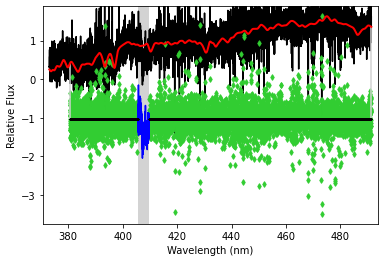

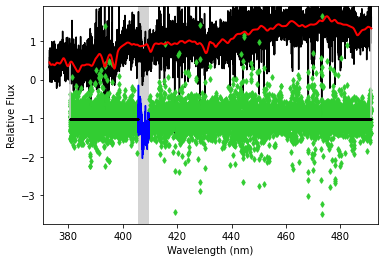

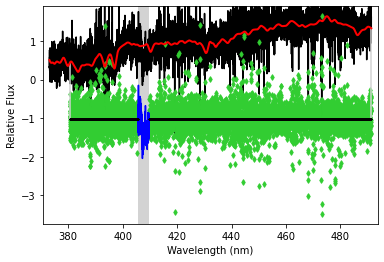

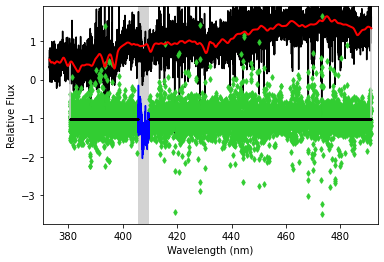

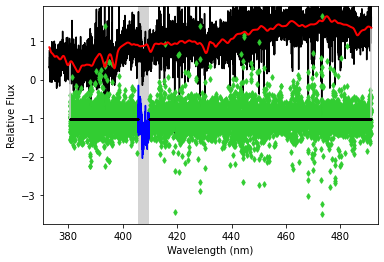

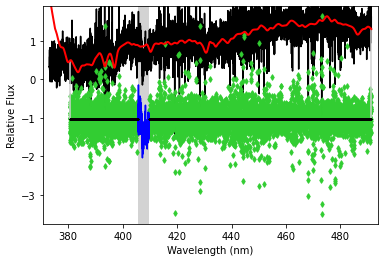

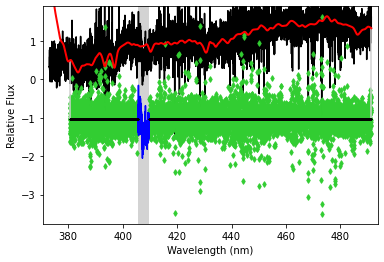

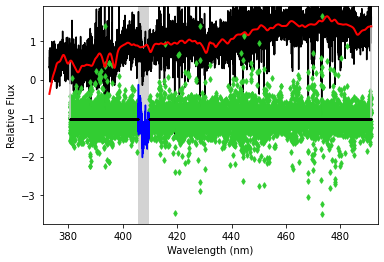

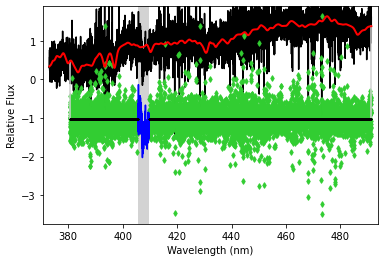

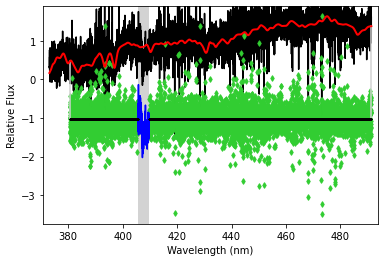

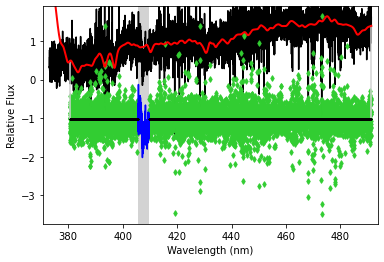

<Figure size 432x288 with 0 Axes>

In [84]:
spec.cal_veldis(temp_spec=temp_spec, degree=[4, 15], mask_reg=mask_reg, show_weight=True, moments=2)

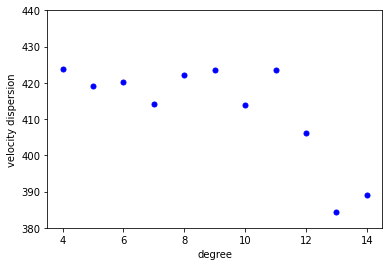

In [61]:
# masking H-beta line
spec.plot_veldis(ylim=[380, 440])

order : 8


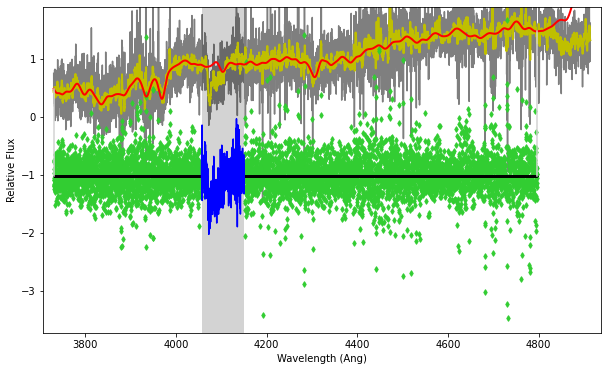

In [62]:
ord_list = np.array([8])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec.plot_fit(order=od, boxsize=11, fig=fg)
    print('order : %d' %od)
    plt.show()

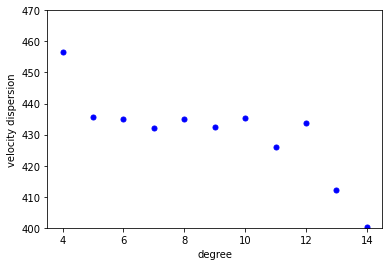

In [40]:
# without masking H-beta line
spec.plot_veldis(ylim=[400, 470])

order : 8


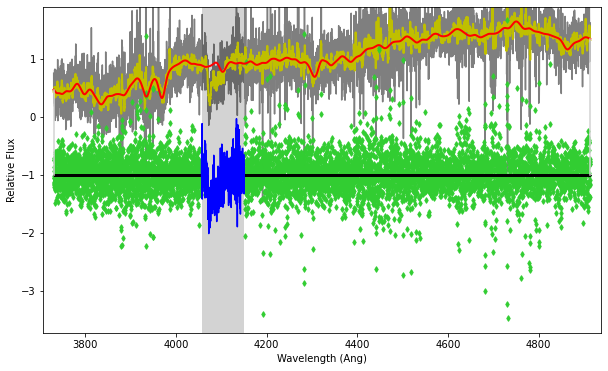

In [42]:
ord_list = np.array([8])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec.plot_fit(order=od, boxsize=11, fig=fg)
    print('order : %d' %od)
    plt.show()

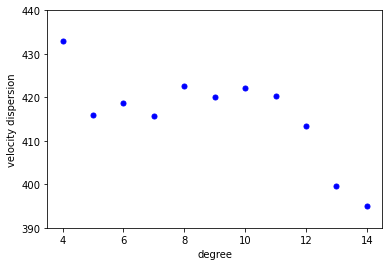

In [65]:
# Not masking H-delta line. However, this line may be within A-band.
spec.plot_veldis(ylim=[390, 440])

order : 8


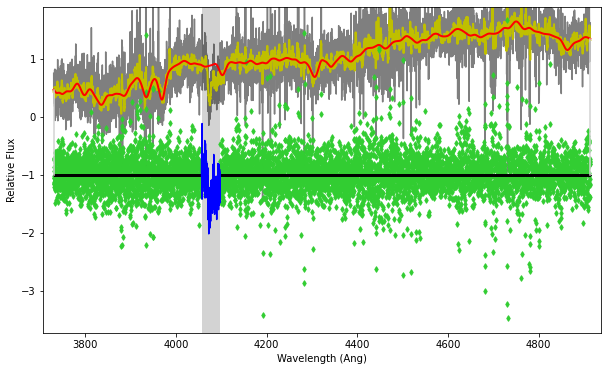

In [66]:
ord_list = np.array([8])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec.plot_fit(order=od, boxsize=11, fig=fg)
    print('order : %d' %od)
    plt.show()

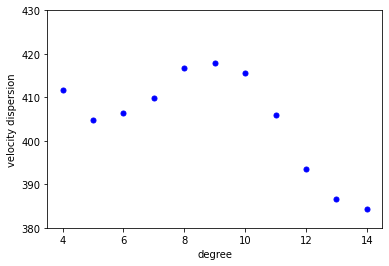

In [69]:
# Not masking H-delta line and masking H-beta line
spec.plot_veldis(ylim=[380, 430])

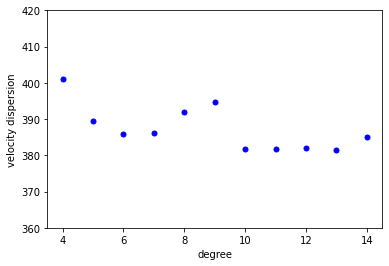

In [72]:
# masking some absorption lines at the bluest part
spec.plot_veldis(ylim=[360, 420])

order : 8


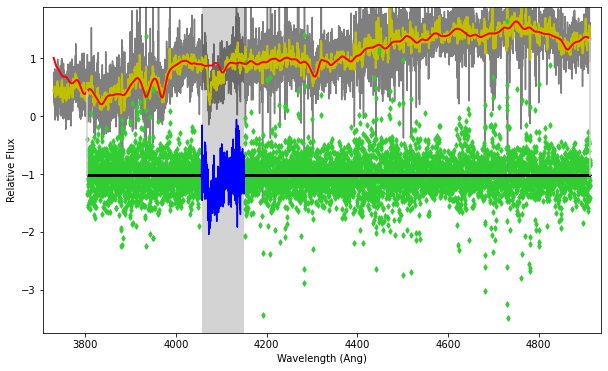

In [73]:
ord_list = np.array([8])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec.plot_fit(order=od, boxsize=11, fig=fg)
    print('order : %d' %od)
    plt.show()

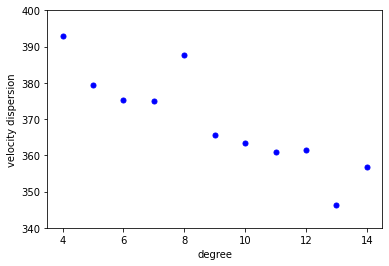

In [77]:
# masking some absorption lines at the bluest part and also H-beta line
spec.plot_veldis(ylim=[340, 400])

order : 8


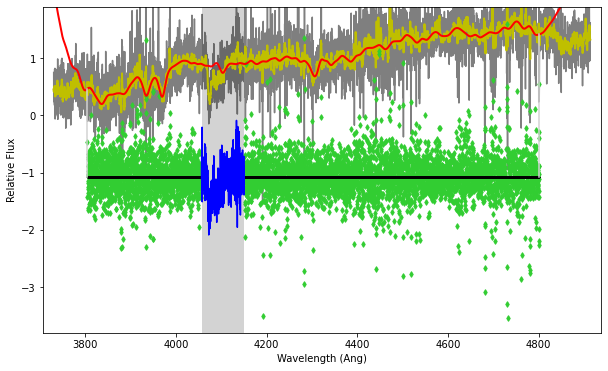

In [78]:
ord_list = np.array([8])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec.plot_fit(order=od, boxsize=11, fig=fg)
    print('order : %d' %od)
    plt.show()

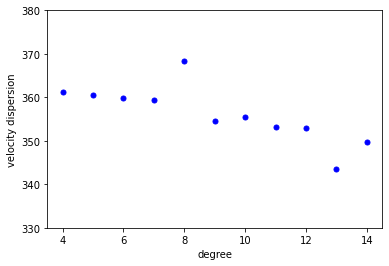

In [81]:
# masking some absorption lines at the bluest part and also H-beta line but including H-delta in A-band
spec.plot_veldis(ylim=[330, 380])

order : 8


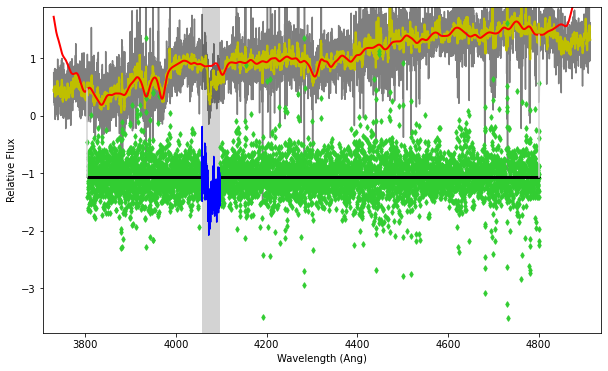

In [82]:
ord_list = np.array([8])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec.plot_fit(order=od, boxsize=11, fig=fg)
    print('order : %d' %od)
    plt.show()

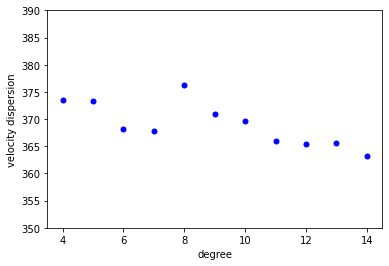

In [87]:
# masking some absorption lines at the bluest part but including H-delta in A-band and  H-beta
spec.plot_veldis(ylim=[350, 390])

order : 8


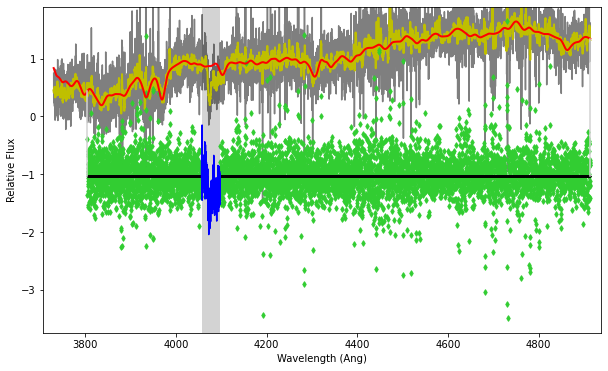

In [86]:
ord_list = np.array([8])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec.plot_fit(order=od, boxsize=11, fig=fg)
    print('order : %d' %od)
    plt.show()

## Blue side

In [93]:
spec_b = Veldis('../spectra_extraction/J0818_ESI_spectra/spec1d_J0818_coadd2d_deflector.fits', 
              informat='fits', logwav=True, trimsec=[4750, 8200]) #13600, [4130, 12200]


Reading spectrum from ../spectra_extraction/J0818_ESI_spectra/spec1d_J0818_coadd2d_deflector.fits
Expected file format: fits
 Spectrum Start:  6961.41
 Spectrum End:     7936.07
 Dispersion (1st pixel):   0.26
 Dispersion (average):      0.28




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       6997.50
[Fe VII]      3761.40       7018.77
H-iota        3770.00       7034.82
H-theta       3797.00       7085.20
H-eta         3835.00       7156.11
CN bandhd     3883.00       7245.68
CaII K        3933.67       7340.23
CaII H        3968.47       7405.17
H-delta       4101.00       7652.47


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-delta       4101.00       7652.47



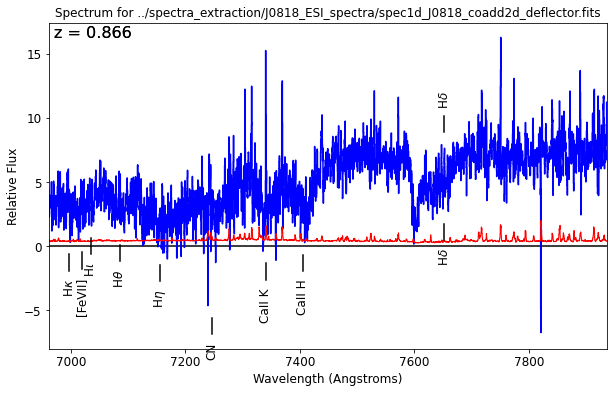

In [94]:
fg = plt.figure(figsize=(10,6))
spec_b.smooth(3, fig=fg)
spec_b.mark_lines('abs', z=0.866, usesmooth=True)
spec_b.mark_lines('em', z=0.866, usesmooth=True)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389921 km/s


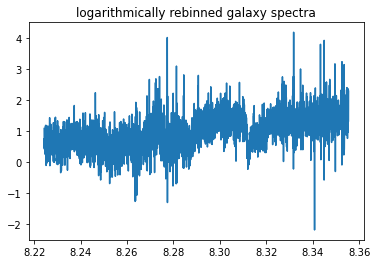

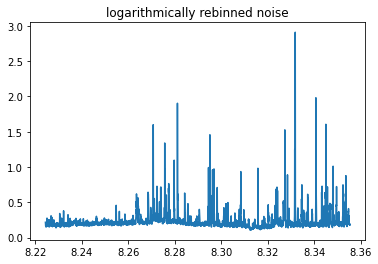

In [95]:
spec_b.cal_parm(z=0.866, high_z=True, logscale=True, veldis_start=250, noise_scale=0.2)

In [96]:
temp_spec_b = spec_b.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.3)# temp_num=500,


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -22146.213010 

sigma_diff : 0.989778


In [97]:
mask_reg = np.log(np.array([(7570, 7745)])/1.866) 
mask_reg1 = np.log(np.array([(6960, 7100), (7570, 7745)])/1.866)
mask_reg2 = np.log(np.array([(6960, 7100), (7570, 7645)])/1.866)
mask_reg3 = np.log(np.array([(7570, 7645)])/1.866)


degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       127       547
chi2/DOF: 3.541; degree = 4; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1268

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       127       554
chi2/DOF: 3.540; degree = 5; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1268

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       108       557
chi2/DOF: 3.539; degree = 6; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1268

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:        57       589
chi2/DOF: 3.537; degree = 7; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  9 / 1268

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:       1

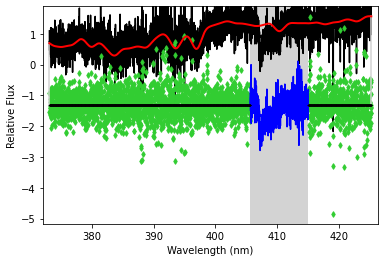

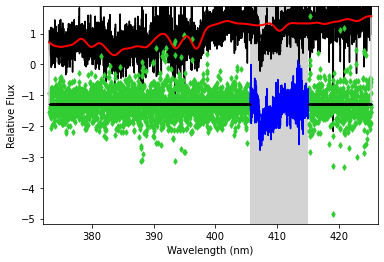

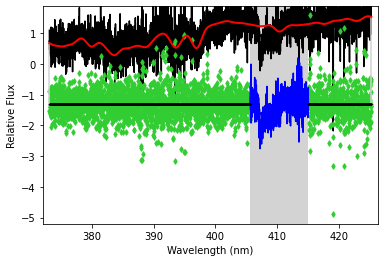

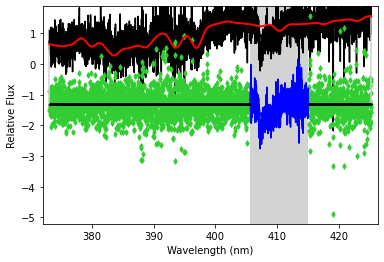

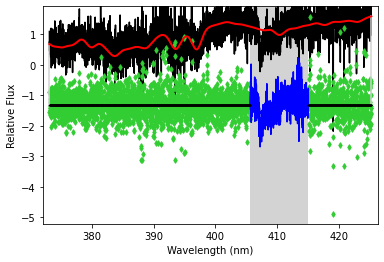

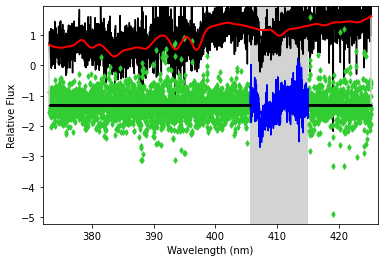

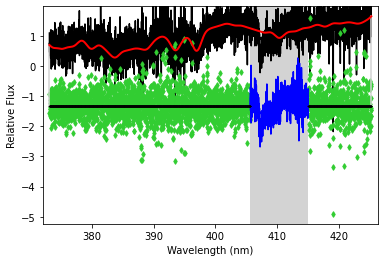

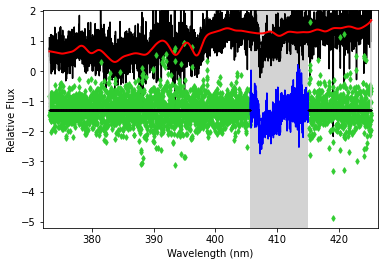

<Figure size 432x288 with 0 Axes>

In [98]:
spec_b.cal_veldis(temp_spec=temp_spec_b, degree=[4, 12], mask_reg=mask_reg, show_weight=True, moments=2)

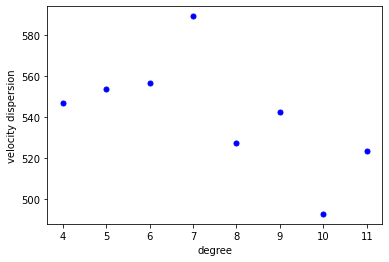

In [99]:
spec_b.plot_veldis()


degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       116       524
chi2/DOF: 3.521; degree = 4; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1268

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       116       525
chi2/DOF: 3.520; degree = 5; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1268

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       109       528
chi2/DOF: 3.520; degree = 6; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1268

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:        66       536
chi2/DOF: 3.519; degree = 7; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1268

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:       

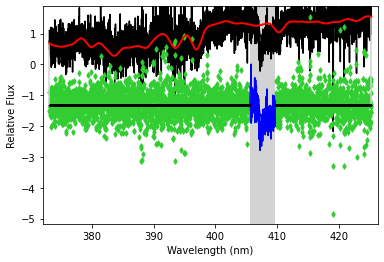

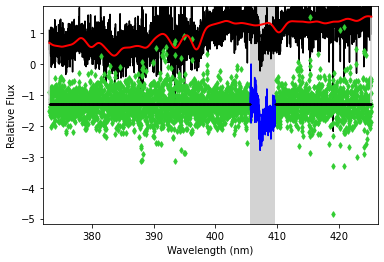

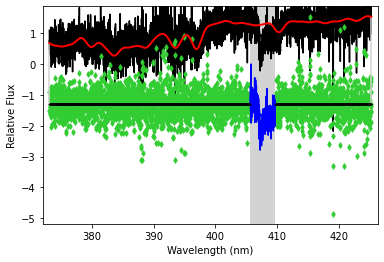

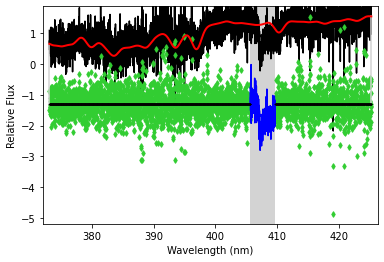

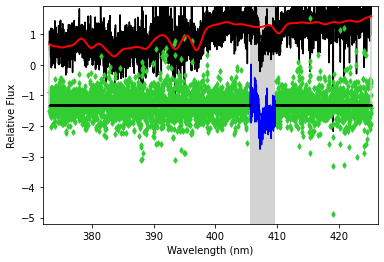

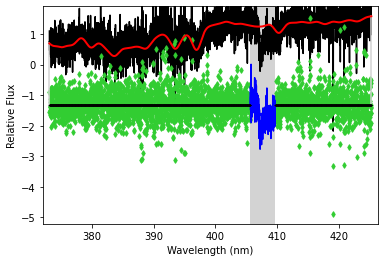

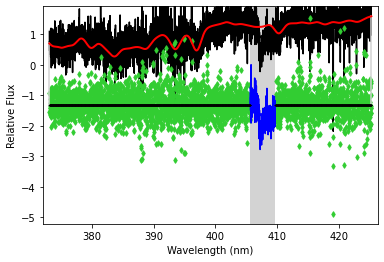

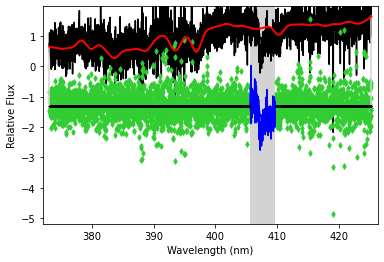

<Figure size 432x288 with 0 Axes>

In [100]:
spec_b.cal_veldis(temp_spec=temp_spec_b, degree=[4, 12], mask_reg=mask_reg3, show_weight=True, moments=2)

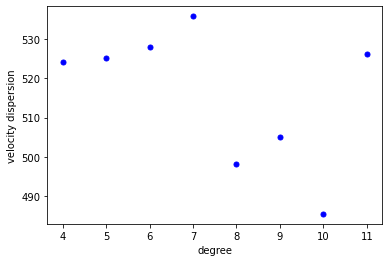

In [101]:
spec_b.plot_veldis()


degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       105       413
chi2/DOF: 3.567; degree = 4; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1268

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:        88       442
chi2/DOF: 3.564; degree = 5; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1268

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:        48       406
chi2/DOF: 3.562; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  10 / 1268

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:        57       424
chi2/DOF: 3.561; degree = 7; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  8 / 1268

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:        

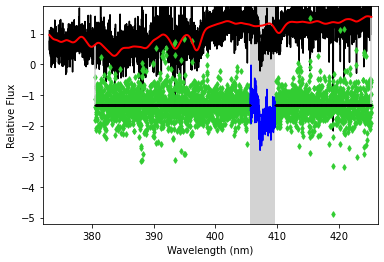

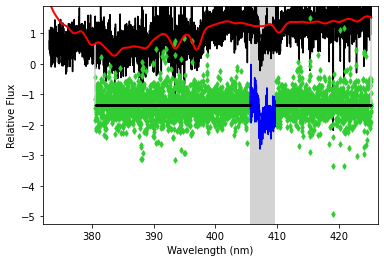

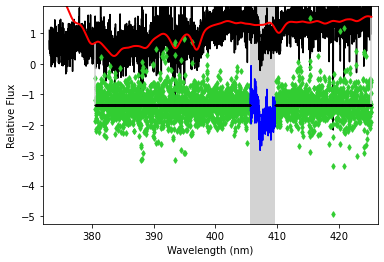

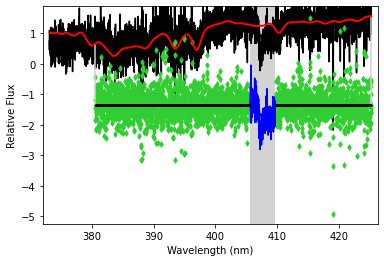

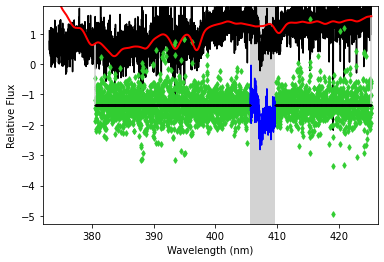

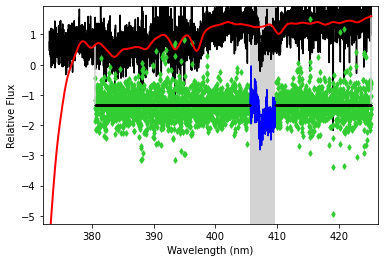

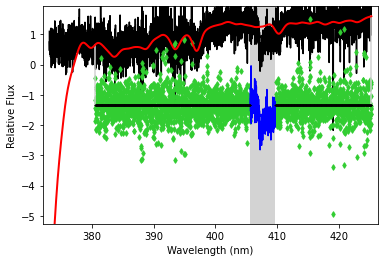

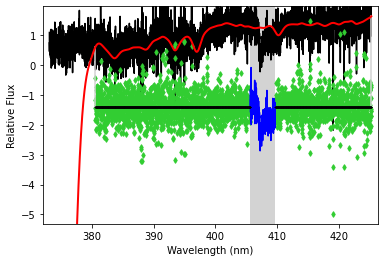

<Figure size 432x288 with 0 Axes>

In [102]:
spec_b.cal_veldis(temp_spec=temp_spec_b, degree=[4, 12], mask_reg=mask_reg2, show_weight=True, moments=2)

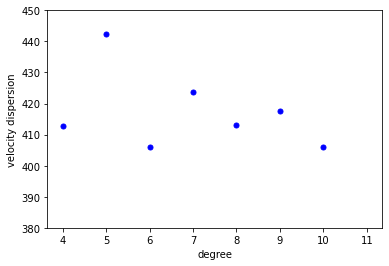

In [104]:
spec_b.plot_veldis(ylim=[380, 450])


degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       152       466
chi2/DOF: 3.600; degree = 4; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1268

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       111       394
chi2/DOF: 3.591; degree = 5; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1268

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       106       401
chi2/DOF: 3.591; degree = 6; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1268

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:       120       420
chi2/DOF: 3.589; degree = 7; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  8 / 1268

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:       1

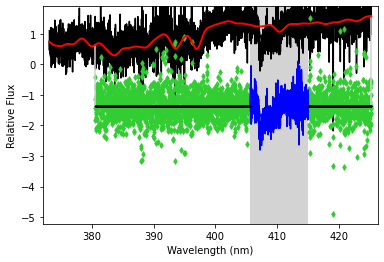

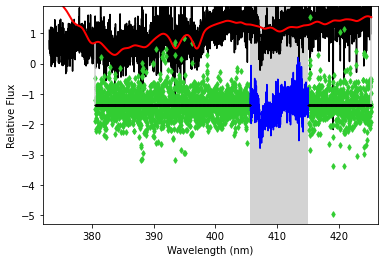

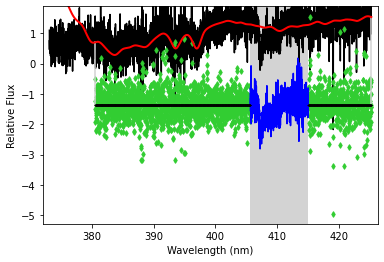

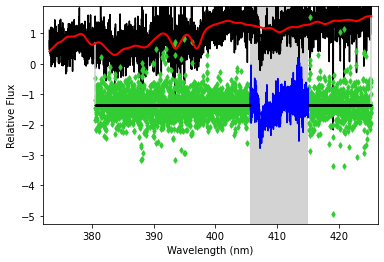

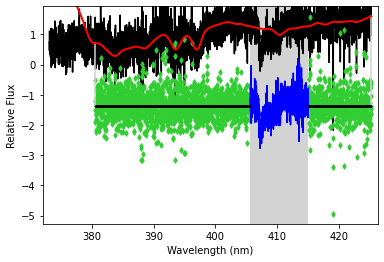

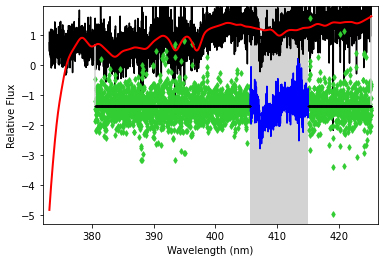

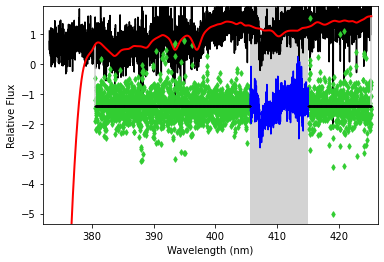

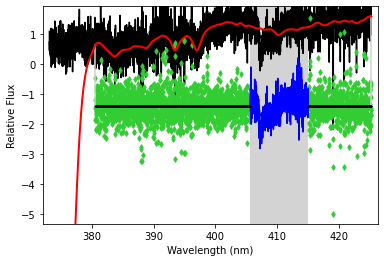

<Figure size 432x288 with 0 Axes>

In [107]:
spec_b.cal_veldis(temp_spec=temp_spec_b, degree=[4, 12], mask_reg=mask_reg1, show_weight=True, moments=2)

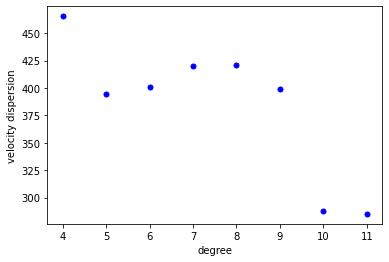

In [108]:
spec_b.plot_veldis()

## Red side

In [109]:
spec_r = Veldis('../spectra_extraction/J0818_ESI_spectra/spec1d_J0818_coadd2d_deflector.fits', 
              informat='fits', logwav=True, trimsec=[8201, 12000]) #13600, [4130, 12200]


Reading spectrum from ../spectra_extraction/J0818_ESI_spectra/spec1d_J0818_coadd2d_deflector.fits
Expected file format: fits
 Spectrum Start:  7936.67
 Spectrum End:     9168.65
 Dispersion (1st pixel):   0.30
 Dispersion (average):      0.32




Line        lambda_rest  lambda_obs
----------  -----------  -----------
G-band        4305.00       8033.13
H-gamma       4340.00       8098.44
Fe4383        4383.00       8178.68
Ca4455        4455.00       8313.03
Fe4531        4531.00       8454.85
H-beta        4861.00       9070.63


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-gamma       4340.00       8098.44
H-beta        4861.00       9070.63



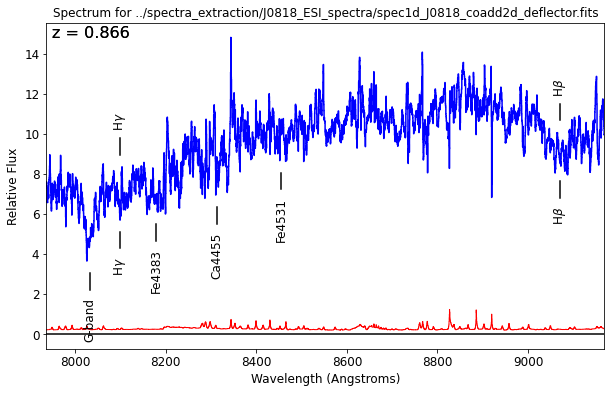

In [118]:
fg = plt.figure(figsize=(10,6))
spec_r.smooth(11, fig=fg)
spec_r.mark_lines('abs', z=0.866, usesmooth=True)
spec_r.mark_lines('em', z=0.866, usesmooth=True)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389922 km/s


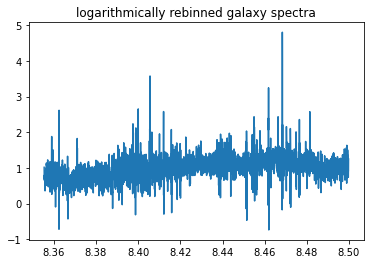

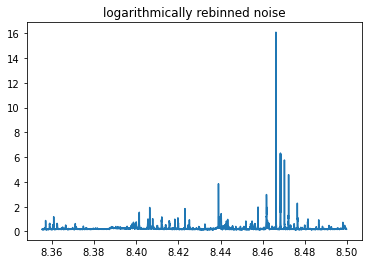

In [111]:
spec_r.cal_parm(z=0.866, high_z=True, logscale=True, veldis_start=250, noise_scale=0.2)

In [112]:
temp_spec_r = spec_r.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.3)# temp_num=500,


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -61452.796350 

sigma_diff : 0.989778



degree : 4
 Best Fit:       Vel     sigma
 comp.  0:        65       338
chi2/DOF: 1.007; degree = 4; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1268

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:        60       319
chi2/DOF: 1.007; degree = 5; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1268

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:        55       344
chi2/DOF: 1.006; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1268

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:        14       326
chi2/DOF: 1.005; degree = 7; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1268

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:        

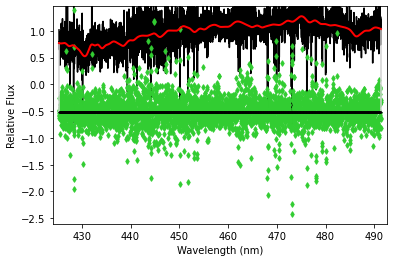

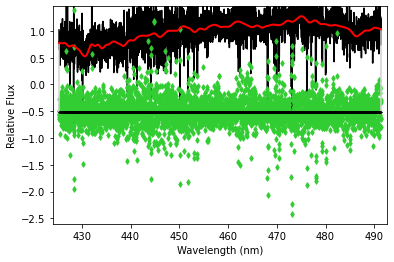

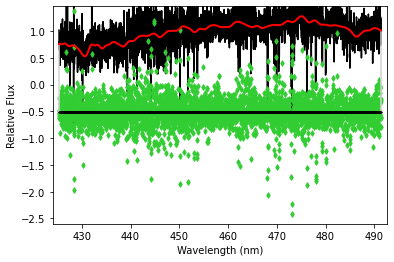

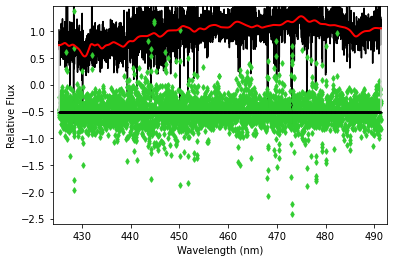

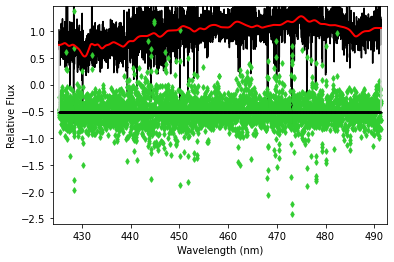

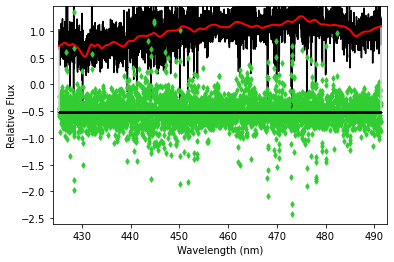

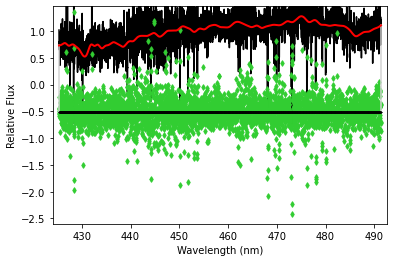

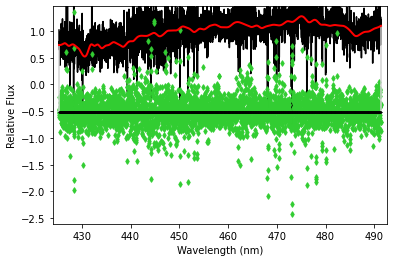

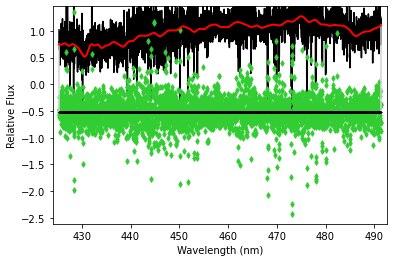

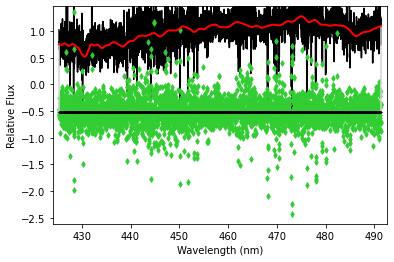

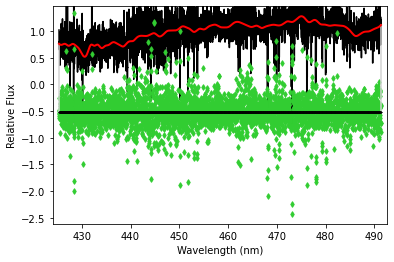

<Figure size 432x288 with 0 Axes>

In [113]:
spec_r.cal_veldis(temp_spec=temp_spec_r, degree=[4, 15], mask_reg=mask_reg1, show_weight=True, moments=2)

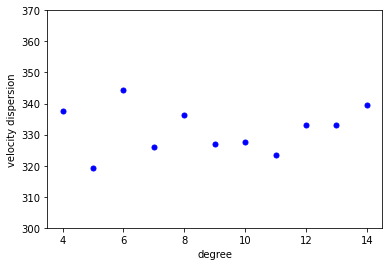

In [116]:
spec_r.plot_veldis(ylim=[300, 370])

order : 8


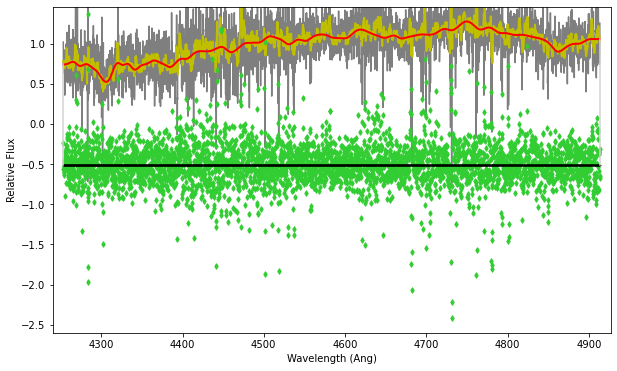

In [119]:
ord_list = np.array([8])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec_r.plot_fit(order=od, boxsize=11, fig=fg)
    print('order : %d' %od)
    plt.show()